# Spatial Transformation

To describe the effect of ageing and the 3D MRI images where gathered.  The participants ranging from 18-80 and many of them having mild to severe Alzimers disease. 

In a large image dataset there will be discrepances like sampling ration, Object orientation and object placement within the image window. One way to address this issue is to register the image into a predifined coordinate system.

### Registration
Registration requires multiple adjustments like shifting, adjustment and scaling. Steps like, 
- Align images to a template
- Minimize spatial variability

Afine transformation modify an image by preserving all points, lines and planes. 

For ex, *Scaling* increases or decreases the size of the image. 
A *Shearing* operation shifts the incident axis away from each other. 

## Translations

The data is taken from OASIS to compare brains of different populations. 

In [2]:
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

First center a singkle slice of a 3D brain volume. i.e first find the center point in the image array and the center of mass of the brain. Then translate the image to the center. 

In [ ]:
# Find image center of mass
com = ndi.center_of_mass(im)

# Calculate amount of shift needed
d0 = 128 - com[0]
d1 = 128 - com[1]

# Translate the brain towards the center
xfm = ndi.shift(im, shift=(d0, d1))

# Plot the original and adjusted images
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im)
axes[1].imshow(xfm)

In cases where an object is angled or flipped, the image can be rotated. Using `ndi.rotate()`, the image is rotated from its center by the specified degrees from the right horizontal axis.

In [ ]:
# Shift the image towards the center
xfm = ndi.shift(im, shift=(-20, -20))

# Rotate the shifted image
xfm = ndi.rotate(xfm, angle=-30, reshape=False)

# Plot the original and transformed images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im)
axes[1].imshow(xfm)

## Resampling

When comparing images, differences between sampling rates and array shapes. Resampling is one way to address this issue. 

Resampling is just slicing your data into a different array. Its is distant from cropping and the field of view does not change. ie, It changes the array shape. The amount if space sampled by each pixel is increased or decreased. 

One such method is *Downsampling*, where the information is merged across multiple pixels to reduce the image size. 

*Upsampling* on the other side resamples image to a larger grid. Important to note that it does not increase the resolution and it is not the same as getting more data. 

To upsample an image we use the `ndi.zoom()` function ans specify a larger zoom factor. 

## Interpolation

Resampling creates a brand new image based on the old one. In most of these cases it requires filling out data which wasn't originally there. This Estimation process is called Interpolation. 

For interpolation we generally use a *Nearest nieghbour* method which uses the closest measured value or *B-Spline Interpolation* a higher order method which is space between points with spline functions of a specified order. The order is between 1 and 5, i.e it uses a set of functions that model the space between points. Order controls the complexity. Order of 1 in linear, 2 is quadratic and so on. 

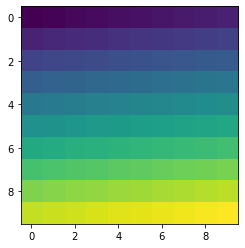

In [3]:
# Example. 

import numpy as np
import matplotlib.pyplot as plt
im = np.arange(100).reshape([10,10])
plt.imshow(im)
plt.show()

a `zoom` order of 0 essentially returns the same image. whereas a higher order shows a smoother gradient of change. 

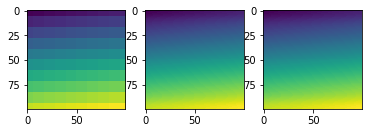

In [11]:
zm1 = ndi.zoom(im, zoom = 10, order = 0)
zm2 = ndi.zoom(im, zoom = 10, order = 2)
zm3 = ndi.zoom(im, zoom = 10, order = 3)


fig, axes = plt.subplots(1, 3)
axes[0].imshow(zm1)
axes[1].imshow(zm2)
axes[2].imshow(zm3)

In [ ]:
# Resampling is done as below. Below is a sample code. 

# Center and level image
xfm = ndi.shift(im, shift=(-20, -20))
xfm = ndi.rotate(xfm, angle=-35, reshape=False)

# Resample image
im_dn = ndi.zoom(xfm, zoom=0.25)
im_up = ndi.zoom(xfm, zoom=4.00)

# Plot the images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im_dn)
axes[1].imshow(im_up)

Interpolation is applied using SciPy's spline function. Here is an example. 

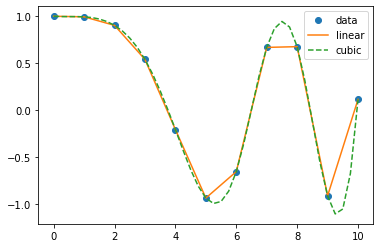

In [17]:
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10,num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')